### **Import Libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import PIL

In [2]:
# Loading files from tensorflow

url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = keras.utils.get_file('flower_photos', origin=url, cache_dir='.', untar=True)

In [3]:
# Import PathLib to convert the path to the windows type
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [4]:
# Analyzing the number of photos
img_num = len(list(data_dir.glob('*/*.jpg')))

print(f"We've a total of {img_num} images in this dataset")

We've a total of 3670 images in this dataset


In [5]:
# Testing Glob Searching

print(len(list(data_dir.glob("daisy/*"))))
daisy_flowers = list(data_dir.glob("daisy/*"))[:5]
daisy_flowers

633


[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

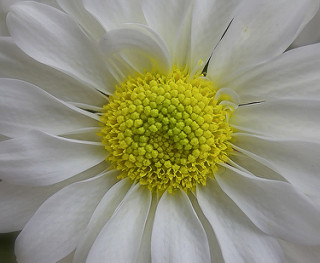

In [6]:
PIL.Image.open(daisy_flowers[0])

In [7]:
# Making dictonary of flower categories

img_flowers = {
    "daisy": list(data_dir.glob("daisy/*")),
    "dandelion": list(data_dir.glob("dandelion/*")),
    "roses": list(data_dir.glob("roses/*")),
    "sunflowers": list(data_dir.glob("sunflowers/*")),
    "tulips": list(data_dir.glob("tulips/*"))
}

In [8]:
label_flowers = {
    "daisy": 0,
    "dandelion": 1,
    "roses": 2,
    "sunflowers": 3,
    "tulips": 4
}

In [9]:
# Organizing the datafor X and Y
X, y = [], []

total_width = 0
total_height = 0

for images in img_flowers.values():
    for image in images:
        with PIL.Image.open(image) as img:
            width, height = img.size            
            total_width += width
            total_height += height

avg_width = round(total_width/img_num)
avg_height = round(total_height/img_num)

for name, images in img_flowers.items():
    for image in images:
        img = cv2.imread(str(image))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_resize = cv2.resize(img_rgb, (avg_width, avg_height))
        X.append(img_resize)
        y.append(label_flowers[name])
        

In [10]:
# Convert to numpy array
X = np.array(X)
y = np.array(y)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, shuffle=True)

In [12]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

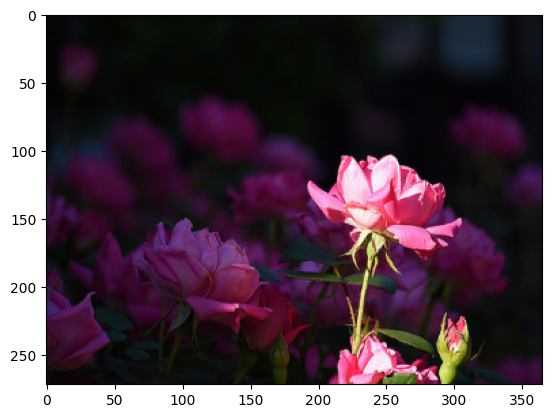

In [13]:
plt.imshow(X_train[0])

In [18]:
num_classes = len(label_flowers)

cnn = keras.Sequential([
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

cnn.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

In [19]:
cnn.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 15s 96ms/step - loss: 1.4771 - accuracy: 0.4219
Epoch 2/10
86/86 [==============================] - 8s 96ms/step - loss: 0.9987 - accuracy: 0.6036
Epoch 3/10
86/86 [==============================] - 8s 96ms/step - loss: 0.7730 - accuracy: 0.7020
Epoch 4/10
86/86 [==============================] - 8s 96ms/step - loss: 0.5066 - accuracy: 0.8183
Epoch 5/10
86/86 [==============================] - 8s 96ms/step - loss: 0.2237 - accuracy: 0.9241
Epoch 6/10
86/86 [==============================] - 8s 98ms/step - loss: 0.1153 - accuracy: 0.9677
Epoch 7/10
86/86 [==============================] - 8s 97ms/step - loss: 0.0534 - accuracy: 0.9880
Epoch 8/10
86/86 [==============================] - 8s 98ms/step - loss: 0.0680 - accuracy: 0.9807
Epoch 9/10
86/86 [==============================] - 8s 98ms/step - loss: 0.0346 - accuracy: 0.9938
Epoch 10/10
86/86 [==============================] - 8s 95ms/step - loss: 0.0245 - accuracy: 0.9935


In [21]:
cnn.evaluate(X_test, y_test)
# Getting Overfitting

29/29 [==============================] - 3s 44ms/step - loss: 474.0274 - accuracy: 0.5927


[474.0274353027344, 0.5926724076271057]